In [1]:
#Will Cheney Jan 2020
#Script used to fit curve to opioid biosensor activation by varying concentration of agonists.
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import ttest_ind_from_stats
from scipy import stats


In [2]:

#Potential functions to fit to data
def linear(x, m, b):
    return m*x + b


def logistic(x, b, c, k):
    return b / (1.0 + np.exp(-k**(x-c)))

def hill(x, a,b ,c ,n ):
    return a + ((b - a) / (1 + (c/x)**n))

In [3]:
#Opioid Biosensor activation data
#xdata = concentrations of agonists

xdata = np.array([(10**-10), (10**-9), (10**-8), (10**-7), (10**-6),(10**-5), (10**-4), (10**-3)])

wcy79_morphine = np.array([1316.98, 1351.28, 1375.43, 1409.73, 1424.36, 2103.68, 9868.89, 41183.46])
wcy79_damgo = np.array([1425.78, 1337.12, 1265.32, 1232.10, 10718.93, 135717.56, 147427.49, 145866.31])
wcy79_enkephalin = np.array([1465.14, 1479.19, 1805.29, 1443.76, 4544.21, 75544.53, 145816.19, 151685.50])
wcy79_endoI = np.array([1332.98, 1402.04, 1423.38, 1465.42, 3976.35, 49998.41, 136150.91, 150359.42])
wcy79_endoII = np.array([1429.81, 1425.84, 1397.72, 1295.58, 3406.54, 40959.75, 128641.67, 155739.96])
wcy79_codeine = np.array([1472.18, 1415.52, 1301.96, 1453.43, 1424.38, 1443.58, 1432.83, 1400.22])


wcy80_morphine = np.array([1250.81, 1333.83, 1358.47, 1380.94, 1405.89, 1439.22, 1594.57, 6271.57])
wcy80_damgo = np.array([1380.61, 1376.02, 1336.73, 1251.04, 1380.40, 111742.17, 193461.48, 219841.44])
wcy80_enkephalin = np.array([1420.30, 1371.57, 1381.84, 1402.27, 1402.45, 8873.37, 149230.60, 186922.09])
wcy80_endoI = np.array([1253.95, 1309.07, 1337.26, 1342.97, 1400.44, 2205.47, 73875.87, 201307.43])
wcy80_endoII = np.array([1338.16, 1347.53, 1369.95, 1259.83, 1259.60, 1736.15, 13629.70, 115494.01])
wcy80_codeine = np.array([1256.96, 1253.11, 1158.15, 1269.39, 1263.67, 1291.87, 1254.73, 1253.54])


wcy79_morphine_sd = np.array([38.31, 104.155, 2.895, 45.075, 27.445, 329.335, 2117.795, 19331.33])
wcy79_damgo_sd = np.array([13.145, 50.31, 80.55, 57.275, 4821.085, 9621.5, 213.79, 626.175])
wcy79_enkephalin_sd = np.array([37.6, 13.38, 214.125, 3.295, 1723.725, 21310.53, 5009.425, 2993.39])
wcy79_endoI_sd = np.array([2.41, 16.07, 16.875, 4.46, 1575.96, 25405.995, 6681.19, 5094.95])
wcy79_endoII_sd = np.array([11.33, 15.165, 12.31, 2.805, 1391.535, 22934.98, 21769.025, 2420.22])
wcy79_codeine_sd = np.array([47.285, 57.295, 11.45, 60.905, 43.36, 24.585, 40.875, 18.015])


wcy80_morphine_sd = np.array([39.75, 10.815, 13.145, 5.79, 3.805, 28.42, 64.38, 1636.23])
wcy80_damgo_sd = np.array([41.65, 4.88, 34.725, 13.795, 35.005, 8531.015, 5739.425, 21398.12])
wcy80_enkephalin_sd = np.array([30.55, 0.075, 25.755, 60.575, 61.51, 1420.43, 8380.07, 13127.805])
wcy80_endoI_sd = np.array([10.38, 31.93, 35.65, 43.64, 33.185, 244.635, 7483.385, 7696.265])
wcy80_endoII_sd = np.array([62.935, 24.675, 11.745, 7.01, 20.94, 123.675, 2416.215, 1361.575])
wcy80_codeine_sd = np.array([37.54, 33.77, 43.295, 31.605, 50.52, 13.535, 12.825, 3.225])

In [4]:
#Uses SciPy curve_fit to identify optimal parameters for fitting hill function to opioid biosensor data
#curve_fit returns optimized parameters and covariance

wcy79_damgo_opt, wcy79_damgo_cov = curve_fit(hill, xdata, wcy79_damgo, p0 = [1200,150000, 10**-6, 1])
wcy79_morphine_opt, wcy79_morphine_cov = curve_fit(hill, xdata, wcy79_morphine, p0 = [1200,100000, 10**-3, 1])
wcy79_enkephalin_opt, wcy79_enkephalin_cov = curve_fit(hill, xdata, wcy79_enkephalin, p0 = [1200,150000, 10**-6, 1])
wcy79_endoI_opt, wcy79_endoI_cov = curve_fit(hill, xdata, wcy79_endoI, p0 = [1200,150000, 10**-4, 1])
wcy79_endoII_opt, wcy79_endoII_cov = curve_fit(hill, xdata, wcy79_endoII, p0 = [1200,150000, 10**-4, 1])
wcy79_codeine_opt, wcy79_codeine_cov = curve_fit(linear, xdata, wcy79_codeine, p0 = [0, 1400])

wcy80_damgo_opt, wcy80_damgo_cov = curve_fit(hill, xdata, wcy80_damgo, p0 = [1200,200000, 10**-6, 1])
wcy80_morphine_opt, wcy80_morphine_cov = curve_fit(hill, xdata, wcy80_morphine, p0 = [1200,50000, 10**-3, 1], maxfev = 10000)
wcy80_enkephalin_opt, wcy80_enkephalin_cov = curve_fit(hill, xdata, wcy80_enkephalin, p0 = [1200,180000, 10**-6, 1])
wcy80_endoI_opt, wcy80_endoI_cov = curve_fit(hill, xdata, wcy80_endoI, p0 = [1200,180000, 10**-4, 1])
wcy80_endoII_opt, wcy80_endoII_cov = curve_fit(hill, xdata, wcy80_endoII, p0 = [1200,180000, 10**-4, 1])
wcy80_codeine_opt, wcy80_codeine_cov = curve_fit(linear, xdata, wcy80_codeine, p0 = [0, 1400])


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in power
  # This is added back by InteractiveShellApp.init_path()


In [5]:
#Generates new curves using fit parameters

# Initialize x values 
xline = np.linspace((10**(-10)), (10**(-1)),1000000)

# Calculate y values for each x using fit parameters
wcy79_damgo_hill = hill(xline, *wcy79_damgo_opt)
wcy79_morphine_hill = hill(xline, *wcy79_morphine_opt)
wcy79_enkephalin_hill = hill(xline, *wcy79_enkephalin_opt)
wcy79_endo1_hill = hill(xline, *wcy79_endoI_opt)
wcy79_endo2_hill = hill(xline, *wcy79_endoII_opt)
wcy79_codeine_lin = linear(xline, *wcy79_codeine_opt)


wcy80_damgo_hill = hill(xline, *wcy80_damgo_opt)
wcy80_morphine_hill = hill(xline, *wcy80_morphine_opt)
wcy80_enkephalin_hill = hill(xline, *wcy80_enkephalin_opt)
wcy80_endo1_hill = hill(xline, *wcy80_endoI_opt)
wcy80_endo2_hill = hill(xline, *wcy80_endoII_opt)
wcy80_codeine_lin = linear(xline, *wcy80_codeine_opt)





/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/pylabtools.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


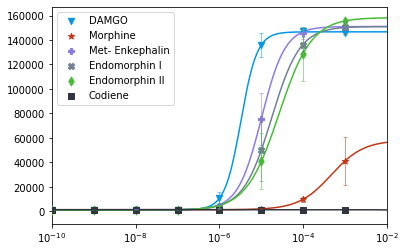

In [6]:
# Generate WCY79(Codon optimized) Figure using Matplotlib 

#Opioid biosensor data
plt.scatter(xdata,wcy79_damgo , s = 40, zorder = 5, color = '#0097e6', marker = 'v', label = 'DAMGO ' )
plt.scatter(xdata,wcy79_morphine , s = 40, zorder = 5, color = '#c23616', marker = '*', label = 'Morphine ')
plt.scatter(xdata, wcy79_enkephalin , s = 40, zorder = 5, color = '#8c7ae6',marker = 'P' , label = 'Met- Enkephalin')
plt.scatter(xdata, wcy79_endoI , s = 40, zorder = 5, color = '#718093',marker = 'X', label = 'Endomorphin I' )
plt.scatter(xdata, wcy79_endoII , s = 40, zorder = 5, color = '#44bd32', marker = 'd', label = 'Endomorphin II' )
plt.scatter(xdata, wcy79_codeine , s = 40, zorder = 5, color = '#2f3640', marker = 's', label = 'Codiene')




#Fit curve
plt.xlim((1*10**(-10)), 0.01)
plt.xscale("log")
#plt.errorbar(xdata, damgo_data, yerr = damgo_error, linestyle = 'none', color = '#377eb8', capsize = 2, elinewidth = 1, zorder = 10)
#plt.errorbar(xdata, morphine_data, yerr = morphine_error , linestyle = 'none', color = '#e41a1c', capsize = 2, elinewidth = 1, zorder = 10)
plt.plot(xline, wcy79_damgo_hill, color = '#0097e6', zorder = 0)
plt.plot(xline, wcy79_morphine_hill, color = '#c23616', zorder = 0)
plt.plot(xline, wcy79_enkephalin_hill, color = '#8c7ae6', zorder = 0)
plt.plot(xline, wcy79_endo1_hill,color = '#718093', zorder = 0)
plt.plot(xline, wcy79_endo2_hill, color = '#44bd32', zorder = 0)
plt.plot(xline, wcy79_codeine_lin, color = '#2f3640', zorder = 0)

#Error bars 
plt.errorbar(xdata, wcy79_morphine, yerr = wcy79_morphine_sd , linestyle = 'none', color = '#c23616', capsize = 2, elinewidth = 1, zorder = 10, alpha = 0.5)
plt.errorbar(xdata, wcy79_damgo, yerr = wcy79_damgo_sd , linestyle = 'none', color = '#0097e6', capsize = 2, elinewidth = 1, zorder = 11,alpha = 0.5)
plt.errorbar(xdata, wcy79_enkephalin, yerr = wcy79_enkephalin_sd , linestyle = 'none', color = '#8c7ae6', capsize = 2, elinewidth = 1, zorder = 12, alpha = 0.5)
plt.errorbar(xdata, wcy79_endoI, yerr = wcy79_endoI_sd , linestyle = 'none', color = '#718093', capsize = 2, elinewidth = 1, zorder = 13, alpha = 0.5)
plt.errorbar(xdata, wcy79_endoII, yerr = wcy79_endoII_sd , linestyle = 'none', color = '#44bd32', capsize = 2, elinewidth = 1, zorder = 14, alpha = 0.5)
plt.errorbar(xdata, wcy79_codeine, yerr = wcy79_codeine_sd , linestyle = 'none', color = '#2f3640', capsize = 2, elinewidth = 1, zorder = 15, alpha = 0.5)



plt.legend()
fig = plt.gcf()

plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/pylabtools.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


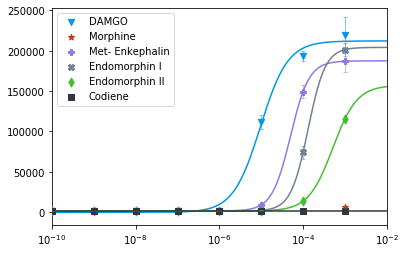

In [7]:
# Generate WCY80(Native Codon) Figure using Matplotlib 

plt.scatter(xdata,wcy80_damgo , s = 40, zorder = 5, color = '#0097e6', marker = 'v', label = 'DAMGO ' )
plt.scatter(xdata,wcy80_morphine , s = 40, zorder = 5, color = '#c23616', marker = '*', label = 'Morphine ')
plt.scatter(xdata, wcy80_enkephalin , s = 40, zorder = 5, color = '#8c7ae6',marker = 'P' , label = 'Met- Enkephalin')
plt.scatter(xdata, wcy80_endoI , s = 40, zorder = 5, color = '#718093',marker = 'X', label = 'Endomorphin I' )
plt.scatter(xdata, wcy80_endoII , s = 40, zorder = 5, color = '#44bd32', marker = 'd', label = 'Endomorphin II' )
plt.scatter(xdata, wcy80_codeine , s = 40, zorder = 5, color = '#2f3640', marker = 's', label = 'Codiene')





plt.xlim((1*10**(-10)), 0.01)
plt.xscale("log")
plt.plot(xline, wcy80_damgo_hill, color = '#0097e6', zorder = 0)
plt.plot(xline, wcy80_enkephalin_hill, color = '#8c7ae6', zorder = 0)
plt.plot(xline, wcy80_endo1_hill,color = '#718093', zorder = 0)
plt.plot(xline, wcy80_endo2_hill, color = '#44bd32', zorder = 0)
plt.plot(xline, wcy80_codeine_lin, color = '#2f3640', zorder = 0)


plt.errorbar(xdata, wcy80_morphine, yerr = wcy80_morphine_sd , linestyle = 'none', color = '#c23616', capsize = 2, elinewidth = 1, zorder = 10, alpha = 0.5)
plt.errorbar(xdata, wcy80_damgo, yerr = wcy80_damgo_sd , linestyle = 'none', color = '#0097e6', capsize = 2, elinewidth = 1, zorder = 11,alpha = 0.5)
plt.errorbar(xdata, wcy80_enkephalin, yerr = wcy80_enkephalin_sd , linestyle = 'none', color = '#8c7ae6', capsize = 2, elinewidth = 1, zorder = 12, alpha = 0.5)
plt.errorbar(xdata, wcy80_endoI, yerr = wcy80_endoI_sd , linestyle = 'none', color = '#718093', capsize = 2, elinewidth = 1, zorder = 13, alpha = 0.5)
plt.errorbar(xdata, wcy80_endoII, yerr = wcy80_endoII_sd , linestyle = 'none', color = '#44bd32', capsize = 2, elinewidth = 1, zorder = 14, alpha = 0.5)
plt.errorbar(xdata, wcy80_codeine, yerr = wcy80_codeine_sd , linestyle = 'none', color = '#2f3640', capsize = 2, elinewidth = 1, zorder = 15, alpha = 0.5)


plt.legend()
fig = plt.gcf()

plt.show()

In [30]:
#Save figure
fig.savefig('2020-05-08 WCY80 all agon both rep',dpi = 300, bbox_inches='tight')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  """Entry point for launching an IPython kernel.


In [8]:

#Can call optimized parameters to get EC50 and hill coefficient
wcy79_damgo_opt

array([1.30254267e+03, 1.46675190e+05, 3.27878076e-06, 2.24911878e+00])

In [6]:
#Dose Response curve for Melatonin biosensor

mltnr = np.array([750.0941599,671.5355312,650.9480771,556.8605967,414.0137075,356.3555718,334.6738447,271.486189,248.2120443,228.2122873,198.1913588])
mltnX = np.array([0.00001,0.000001,0.00000075,0.0000005,0.00000025,0.000000125,0.0000001,0.00000005,0.000000025,0.00000001,0.000000001])

In [9]:
mtn_opt = curve_fit(hill, mltnX, mltnr)
mtn_opt[0]          

array([2.18837652e+02, 7.67613313e+02, 3.23377303e-07, 1.26913598e+00])

In [ ]:
xline = np.linspace((10**(-10)), (10**(-1)),1000000)

mtn_hill = hill(xline, *mtn)